In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_est1 = pd.read_csv("/work/Teste/est_final_p1.csv", usecols =["cnpj_base", "cnpj_ordem", "cnpj_dv", "cd_situacao_cadastral", "dt_situacao_cadastral", "cd_motivo_situacao_cadastral", "dt_inicio_atividade",
                                                              "cd_cnae_principal", "cd_cnae_secundario", "uf",	"cd_municipio"])
df_est2 = pd.read_csv("/work/Teste/est_final_p2.csv", usecols =["cnpj_base", "cnpj_ordem", "cnpj_dv", "cd_situacao_cadastral", "dt_situacao_cadastral", "cd_motivo_situacao_cadastral", "dt_inicio_atividade",
                                                              "cd_cnae_principal", "cd_cnae_secundario", "uf",	"cd_municipio"])

df_est = pd.concat([df_est1, df_est2])
df_est_tratada = df_est.replace('"','', regex=True)
df_est_tratada.isnull().sum()
df_est_tratada = df_est_tratada.dropna()
df_est_tratada["cnpj_base_2"] = df_est_tratada['cnpj_base'].astype(str).astype(int)

In [ ]:
df_est_tratada.drop(columns = ["cnpj_ordem", "cnpj_dv", "cd_motivo_situacao_cadastral","cd_municipio" ], inplace= True)

In [ ]:
df_est_tratada = df_est_tratada[(df_est_tratada["uf"] == "RJ")  | (df_est_tratada["uf"] == "SP") | (df_est_tratada["uf"] == "MG") | (df_est_tratada["uf"] == "ES")]

In [ ]:
df_est_tratada = df_est_tratada.query("dt_situacao_cadastral != '0'")

In [ ]:
df_est_tratada.head()

,cnpj_base,cd_situacao_cadastral,dt_situacao_cadastral,dt_inicio_atividade,cd_cnae_principal,cd_cnae_secundario,uf,cnpj_base_2
1,11124191,04,20190328,20090909,4930201,,RJ,11124191
2,02180764,08,20151208,20090909,4784900,,RJ,2180764
4,11124231,04,20210226,20090903,8230001,,SP,11124231
9,11124289,02,20090812,20090812,8512100,8513900,SP,11124289
10,11124304,02,20090909,20090909,1091101,"4637104,4637101,4637102,4637103,4637107,4637199",RJ,11124304
...,...,...,...,...,...,...,...,...
177631,19093760,08,20180201,20131018,8230002,8230001,SP,19093760
177633,14189580,02,20130705,20130705,9491000,,MG,14189580
177634,16628041,08,20131125,20120611,7420001,8219901,SP,16628041
177635,19093797,02,20131018,20131018,9602502,"7739099,4729699,4772500",SP,19093797


In [ ]:
df_est_tratada = df_est_tratada.drop(labels=(90214), axis=0)

In [ ]:
df_est_tratada["Data_Situação_Cadastral"] = pd.to_datetime(df_est_tratada["dt_situacao_cadastral"], format='%Y%m%d').dt.year
df_est_tratada["Data_Início_Atividade"] = pd.to_datetime(df_est_tratada["dt_inicio_atividade"], format='%Y%m%d').dt.year

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_est_tratada["Anos_de_vida"] = df_est_tratada["Data_Situação_Cadastral"] - df_est_tratada["Data_Início_Atividade"]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_est_tratada["Mes_de_vida"] = (df_est_tratada["Anos_de_vida"]*12).round()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_est_tratada["Setor"] = df_est_tratada["cd_cnae_principal"].astype(str).str[:2]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["01", "02", "03"], "AGRICULTURA")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["05", "06", "07", "08", "09", "89", "97"], "IND. EXTRATIVISTA")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["10", "11","12","13","14","15","16","17","18","19","20","21", 
                    "22", "23","24","25","26","27","28","29","30","31","32","33"], "IND. TRANSFORMAÇÃO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["35"], "ELETRICIDADE")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["36", "37", "38", "39"], "AGUA E ESGOTO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["41", "42", "43"], "CONSTRUCAO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["45", "46", "47"], "COMÉRCIO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["49", "50", "51", "52", "53"], "TRANSPORTE")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["55", "56"], "ALOJAMENTO E ALIMENTAÇÃO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["58", "59", "60", "61", "62", "63"], "INFORMACAO E COMUNICACAO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["64", "65", "66"], "AT. FINANCEIRAS")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["68"], "AT. IMOBILIARIAS")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["69", "70", "71", "72", "73", "74", "75"], "ATIVIDADES PROFISSIONAIS")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["77", "78", "79", "80", "81", "82"], "ATIVIDADES ADMINISTRATIVAS")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["84"], "ADM. PUBLICA")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["85"], "EDUCACAO")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["86", "87", "88"], "SAUDE")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["90", "91", "92", "93"], "ARTES E CULTURA")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["94", "95", "96", "99"], "OUTRAS")

df_est_tratada["Setor"] = df_est_tratada["Setor"].replace(["98"], "SERV. DOMESTICOS")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is tryi

In [ ]:
df_est_tratada["cd_situacao_cadastral"] = df_est_tratada["cd_situacao_cadastral"].replace(["02"], "ATIVA")


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_est_tratada["cd_situacao_cadastral"] = df_est_tratada["cd_situacao_cadastral"].replace(["01", "03", "04", "08"], "INATIVA")

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
teste = df_est_tratada["cd_cnae_secundario"].str.split(",", expand=True)

df_est_tratada["cnae1"] = teste[0]

df_est_tratada["cnae2"] = teste[1]

df_est_tratada["cnae3"] = teste[2]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [ ]:
df_est_tratada["cnae1"] =df_est_tratada["cnae1"].fillna(0)

df_est_tratada["cnae2"] =df_est_tratada["cnae2"].fillna(0)

df_est_tratada["cnae3"] =df_est_tratada["cnae3"].fillna(0)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is tryi

In [ ]:
df_est_tratada["cnae1"] = df_est_tratada["cnae1"].astype("bool").astype(int)
df_est_tratada["cnae2"] = df_est_tratada["cnae2"].astype("bool").astype(int)
df_est_tratada["cnae3"] = df_est_tratada["cnae3"].astype("bool").astype(int)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [ ]:
df_est_tratada["Total"] = df_est_tratada["cnae1"] + df_est_tratada["cnae2"] + df_est_tratada["cnae3"] + 1

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_est_tratada.rename(columns={"cnae1":"Empresa executa 2 atividades", 
                "cnae2": "Empresa executa até 3 atividades",
                "cnae3": "Empresa executa mais de 4 atividades",
                "Total": "Total de atividades executadas"}, inplace = True)

df_est_tratada

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,cnpj_base,cd_situacao_cadastral,dt_situacao_cadastral,dt_inicio_atividade,cd_cnae_principal,cd_cnae_secundario,uf,cnpj_base_2,Data_Situação_Cadastral,Data_Início_Atividade,Anos_de_vida,Mes_de_vida,Setor,Empresa executa 2 atividades,Empresa executa até 3 atividades,Empresa executa mais de 4 atividades,Total de atividades executadas
1,11124191,INATIVA,20190328,20090909,4930201,,RJ,11124191,2019,2009,10,120,TRANSPORTE,0,0,0,1
2,02180764,INATIVA,20151208,20090909,4784900,,RJ,2180764,2015,2009,6,72,COMÉRCIO,0,0,0,1
4,11124231,INATIVA,20210226,20090903,8230001,,SP,11124231,2021,2009,12,144,ATIVIDADES ADMINISTRATIVAS,0,0,0,1
9,11124289,ATIVA,20090812,20090812,8512100,8513900,SP,11124289,2009,2009,0,0,EDUCACAO,1,0,0,2
10,11124304,ATIVA,20090909,20090909,1091101,"4637104,4637101,4637102,4637103,4637107,4637199",RJ,11124304,2009,2009,0,0,IND. TRANSFORMAÇÃO,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177631,19093760,INATIVA,20180201,20131018,8230002,8230001,SP,19093760,2018,2013,5,60,ATIVIDADES ADMINISTRATIVAS,1,0,0,2
177633,14189580,ATIVA,20130705,20130705,9491000,,MG,14189580,2013,2013,0,0,OUTRAS,0,0,0,1
177634,16628041,INATIVA,20131125,20120611,7420001,8219901,SP,16628041,2013,2012,1,12,ATIVIDADES PROFISSIONAIS,1,0,0,2
177635,19093797,ATIVA,20131018,20131018,9602502,"7739099,4729699,4772500",SP,19093797,2013,2013,0,0,OUTRAS,1,1,1,4


In [ ]:
df_est_tratada["Setor"].value_counts()

COMÉRCIO                      122869
OUTRAS                         52474
ALOJAMENTO E ALIMENTAÇÃO       36355
IND. TRANSFORMAÇÃO             30776
ATIVIDADES ADMINISTRATIVAS     25458
CONSTRUCAO                     24231
TRANSPORTE                     21842
ATIVIDADES PROFISSIONAIS       21065
AGRICULTURA                    11460
EDUCACAO                       10993
INFORMACAO E COMUNICACAO       10300
SAUDE                           8637
AT. FINANCEIRAS                 5045
ARTES E CULTURA                 3607
IND. EXTRATIVISTA               3107
AT. IMOBILIARIAS                2652
AGUA E ESGOTO                    897
ADM. PUBLICA                     362
ELETRICIDADE                     111
Name: Setor, dtype: int64

In [ ]:
df_est_tratada.groupby('uf')['cd_situacao_cadastral'].value_counts()

uf  cd_situacao_cadastral
ES  ATIVA                      8766
    INATIVA                    8487
MG  ATIVA                     41655
    INATIVA                   40912
RJ  ATIVA                     35590
    INATIVA                   32867
SP  ATIVA                    118214
    INATIVA                  105750
Name: cd_situacao_cadastral, dtype: int64

In [ ]:
#df_est_tratada.to_csv("/work/Teste/df_est_tratada.csv")

In [ ]:
def layout_grafico(título):
    plt.rcParams.update({'font.size':14})
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set_title(título)
    sns.despine(right= True)

palete= palette= ['#414778', '#507699', '#99a6c2', '#c4c6cc']

# BASE  - Situação Cadastral por UF

In [ ]:
df_est_tratada_ = df_est_tratada.query('Data_Início_Atividade > 2010')

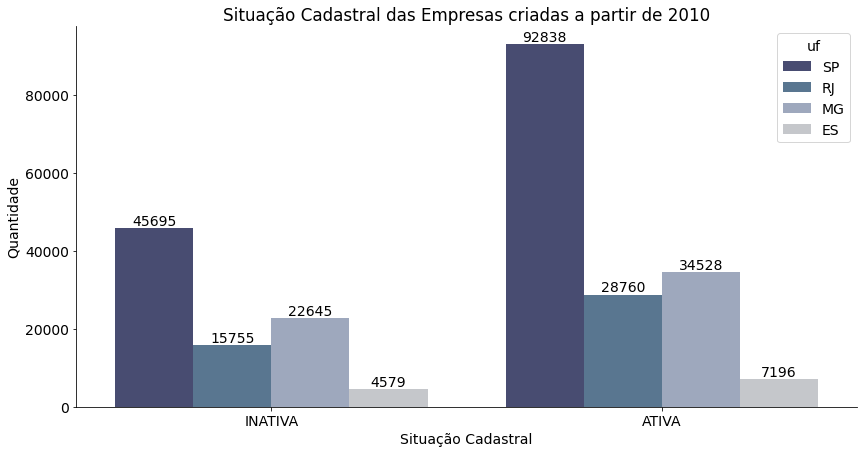

In [ ]:
layout_grafico('Situação Cadastral das Empresas criadas a partir de 2010')


ax = sns.countplot(x= df_est_tratada_["cd_situacao_cadastral"], hue= df_est_tratada_["uf"], palette= {'SP':'#414778', 'RJ': '#507699', 'MG': '#99a6c2', 'ES': '#c4c6cc'})
plt.ylabel('Quantidade')
plt.xlabel('Situação Cadastral')

for container in ax.containers:
    ax.bar_label(container)


In [ ]:
df_situacao_UF = df_est_tratada_.groupby(["uf"])["cd_situacao_cadastral"].value_counts(normalize= True) * 100

df_situacao_UF

uf  cd_situacao_cadastral
ES  ATIVA                    61.112527
    INATIVA                  38.887473
MG  ATIVA                    60.392143
    INATIVA                  39.607857
RJ  ATIVA                    64.607436
    INATIVA                  35.392564
SP  ATIVA                    67.015079
    INATIVA                  32.984921
Name: cd_situacao_cadastral, dtype: float64

# BASE  - Situação Cadastral por Total de Atividades Executadas

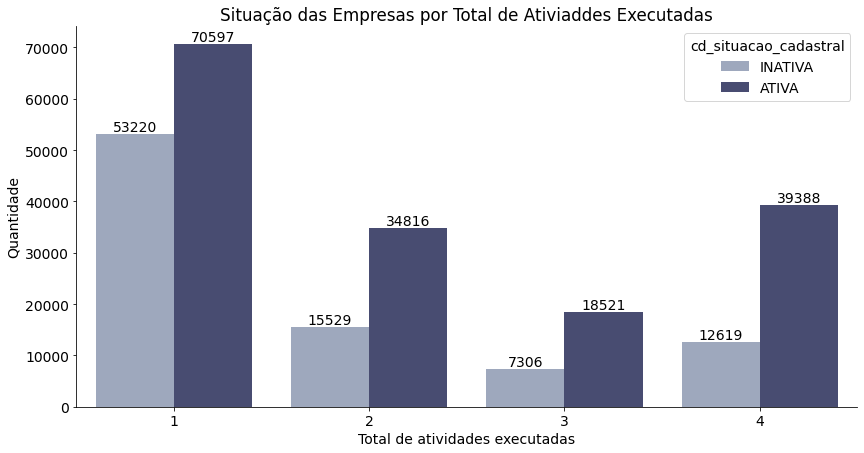

In [ ]:
layout_grafico('Situação das Empresas por Total de Ativiaddes Executadas')
ax = sns.countplot(x= df_est_tratada_["Total de atividades executadas"],hue= df_est_tratada_["cd_situacao_cadastral"], palette= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'})
valor = df_est_tratada_["cd_situacao_cadastral"].value_counts(ascending = False)
plt.ylabel('Quantidade')

for container in ax.containers:
    ax.bar_label(container)

# BASE - Quantidades de Estabelecimentos Abertos desde 2010

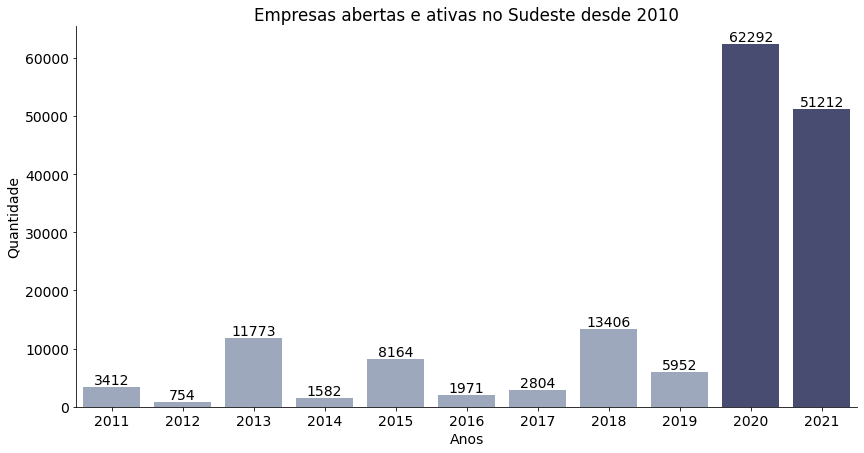

In [ ]:
layout_grafico('Empresas abertas e ativas no Sudeste desde 2010')

df_est_tratada_com = df_est_tratada_.loc[(df_est_tratada_["cd_situacao_cadastral"] == "ATIVA")]

df_est_tratada_com_1 = df_est_tratada_com.loc[(df_est_tratada_com["Data_Início_Atividade"] > 2010)]

ax = sns.countplot(x= df_est_tratada_com_1["Data_Início_Atividade"], palette= ['#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#414778','#414778']
)
plt.ylabel('Quantidade')
plt.xlabel ("Anos")

valor = df_est_tratada_com_1["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

# BASE - Quantidades de Estabelecimentos Fechados desde 2010

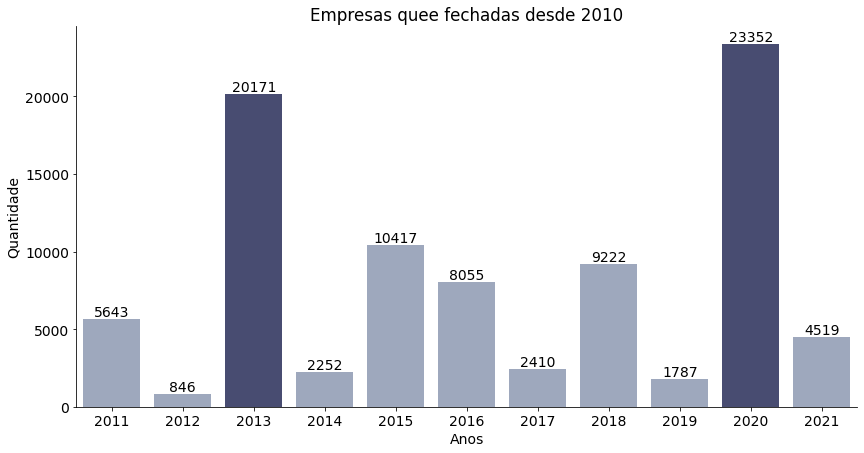

In [ ]:
layout_grafico('Empresas quee fechadas desde 2010')

df_est_tratada_com = df_est_tratada_.loc[(df_est_tratada_["cd_situacao_cadastral"] == "INATIVA")]

ax = sns.countplot(x= df_est_tratada_com["Data_Início_Atividade"], palette= ['#99a6c2','#99a6c2','#414778','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#99a6c2','#414778','#99a6c2']
)
plt.ylabel('Quantidade')
plt.xlabel ("Anos")

valor = df_est_tratada_com_1["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

# 5 Setores por Tempo de Vida Médio

In [ ]:
df_est_tratada_1= df_est_tratada_.loc[(df_est_tratada_["Anos_de_vida"] >=0)]

df_teste_1 = df_est_tratada_1.groupby(["Setor"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_2 = pd.DataFrame(df_teste_1)

df_teste_2 = df_teste_2.loc[(df_teste_2["Setor"] == "COMÉRCIO") | (df_teste_2["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        |(df_teste_2["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_2["Setor"] == "CONSTRUCAO") | (df_teste_2["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

In [ ]:
def plot(fig):
    # Faça as alterações que achar interessante
    # No nosso caso vamos mudar a fonte para Helvetica, mudar a cor do background para branco e colocar as fontes dos eixos em cinza
    fig.update_layout(
        font_family = 'Helvetica',
        template='plotly_white'
    )
    fig.update_traces(
        textfont_size=14,
        textangle=0,
        textposition="outside",
        cliponaxis=False
    )


    # Dê o show na figura
    fig.show()


# 5 Setores por Tempo de Vida Médio e Situação Cadastral

### <font color='red'> Sem filtro incluso Zero anos de vida </font>

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Anos_de_vida"] >=0)]

df_teste_1 = df_est_tratada_1.groupby(["Setor", "cd_situacao_cadastral"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_1 = pd.DataFrame(df_teste_1)

df_teste_1 = df_teste_1.loc[(df_teste_1["Setor"] == "COMÉRCIO") | (df_teste_1["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_teste_1["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_1["Setor"] == "CONSTRUCAO") | (df_teste_1["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

In [ ]:
fig = px.bar(df_teste_1, y = "Anos_de_vida", 
                x= "Setor", text="Anos_de_vida", 
                color = "cd_situacao_cadastral", 
                barmode="group", 
                labels={"Setor": "Setor", 
                        "Anos_de_vida": "Anos",
                        "cd_situacao_cadastral": "Situação Cadastral"}, 
                title= "Vida média das empresas no Sudeste considerando o ano de 2021", 
                color_discrete_map= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'} )




fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

plot(fig)

In [ ]:
df_est_tratada_2= df_est_tratada.loc[(df_est_tratada["Anos_de_vida"] > 0)]

df_teste_ = df_est_tratada_2.groupby(["Setor", "cd_situacao_cadastral"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_ = pd.DataFrame(df_teste_)

df_teste_ = df_teste_.loc[(df_teste_["Setor"] == "COMÉRCIO") | (df_teste_["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_teste_["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_["Setor"] == "CONSTRUCAO") | (df_teste_["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

### <font color='red'> Sem filtro sem Zero anos de vida </font>

In [ ]:
fig = px.bar(df_teste_, y = "Anos_de_vida", 
                x= "Setor", text="Anos_de_vida", 
                color = "cd_situacao_cadastral", 
                barmode="group", 
                labels={"Setor": "Setor", 
                        "Anos_de_vida": "Anos",
                        "cd_situacao_cadastral": "Situação Cadastral"}, 
                title= "Vida média das empresas no Sudeste", 
                color_discrete_map= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'} )




fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

plot(fig)

### <font color='red'> Com filtro incluso Zero anos de vida </font>

In [ ]:
df_est_tratada_3= df_est_tratada_.loc[(df_est_tratada_["Anos_de_vida"] >=0)]

df_teste_2 = df_est_tratada_3.groupby(["Setor", "cd_situacao_cadastral"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_2 = pd.DataFrame(df_teste_2)

df_teste_2 = df_teste_2.loc[(df_teste_2["Setor"] == "COMÉRCIO") | (df_teste_2["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_teste_2["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_2["Setor"] == "CONSTRUCAO") | (df_teste_2["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

In [ ]:
fig = px.bar(df_teste_2, y = "Anos_de_vida", 
                x= "Setor", text="Anos_de_vida", 
                color = "cd_situacao_cadastral", 
                barmode="group", 
                labels={"Setor": "Setor", 
                        "Anos_de_vida": "Anos",
                        "cd_situacao_cadastral": "Situação Cadastral"}, 
                title= "Vida média das empresas no Sudeste até 2021", 
                color_discrete_map= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'} )




fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

plot(fig)

### <font color='red'> Com filtro sem Zero anos de vida </font>

In [ ]:
df_est_tratada_4= df_est_tratada_.loc[(df_est_tratada_["Anos_de_vida"] > 0)]

df_teste_4 = df_est_tratada_4.groupby(["Setor", "cd_situacao_cadastral"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_4 = pd.DataFrame(df_teste_4)

df_teste_4 = df_teste_4.loc[(df_teste_4["Setor"] == "COMÉRCIO") | (df_teste_4["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_teste_4["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_4["Setor"] == "CONSTRUCAO") | (df_teste_4["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

In [ ]:
fig = px.bar(df_teste_4, y = "Anos_de_vida", 
                x= "Setor", text="Anos_de_vida", 
                color = "cd_situacao_cadastral", 
                barmode="group", 
                labels={"Setor": "Setor", 
                        "Anos_de_vida": "Anos",
                        "cd_situacao_cadastral": "Situação Cadastral"}, 
                title= "Vida média das empresas no Sudeste até 2020", 
                color_discrete_map= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'} )




fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

plot(fig)

# 5 principais setores por Situação Cadastral

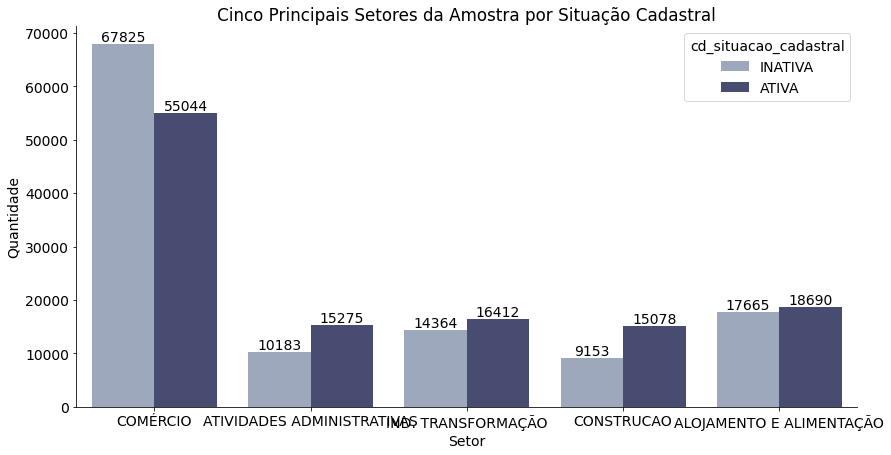

In [ ]:
df_est_tratada_com =df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") | (df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO") | (df_est_tratada["Setor"] == "IND. TRANSFORMAÇÃO") | (df_est_tratada["Setor"] == "CONSTRUCAO") | (df_est_tratada["Setor"] == "ATIVIDADES ADMINISTRATIVAS")]

layout_grafico('Cinco Principais Setores da Amostra por Situação Cadastral')

ax = sns.countplot(x= df_est_tratada_com["Setor"], hue= df_est_tratada_com["cd_situacao_cadastral"], palette= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'}
)

plt.ylabel('Quantidade')

valor = df_est_tratada_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)


# 5 principais setores por total de Atividades

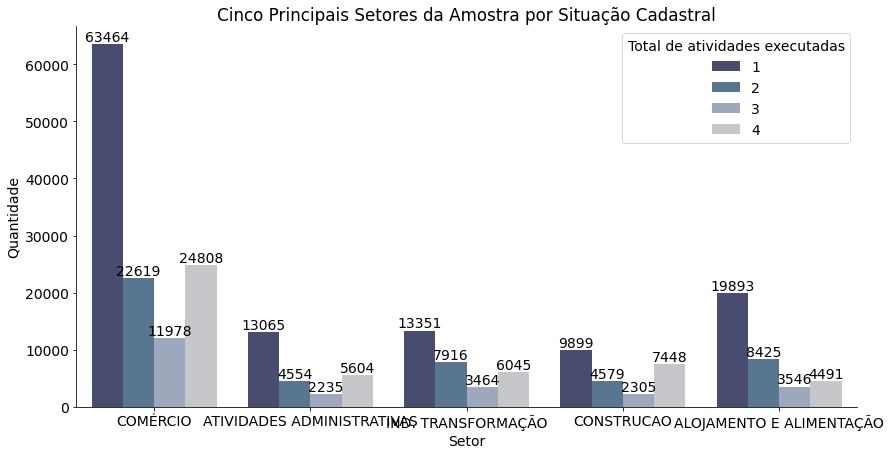

In [ ]:
layout_grafico('Cinco Principais Setores da Amostra por Situação Cadastral')

df_est_tratada_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") | (df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_est_tratada["Setor"] == "IND. TRANSFORMAÇÃO") | (df_est_tratada["Setor"] == "CONSTRUCAO") | (df_est_tratada["Setor"] == "ATIVIDADES ADMINISTRATIVAS")]

ax = sns.countplot(x= df_est_tratada_com["Setor"],hue= df_est_tratada_com["Total de atividades executadas"],
palette= palete)
plt.ylabel('Quantidade')

valor = df_est_tratada_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

# 5 Setores - Taxa de Sobrevivência por Total de Atividade Executada

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") | (df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_est_tratada["Setor"] == "IND. TRANSFORMAÇÃO") | (df_est_tratada["Setor"] == "CONSTRUCAO") | (df_est_tratada["Setor"] == "ATIVIDADES ADMINISTRATIVAS")]



In [ ]:
df_est_tratada_1 = df_est_tratada_1.loc[(df_est_tratada_1["Anos_de_vida"] > 5)]

df_teste = df_est_tratada_1.groupby(["Total de atividades executadas", "Setor"])["cd_situacao_cadastral"].value_counts(normalize=True)

df_teste_1 = pd.DataFrame(df_teste)

df_teste_1 = df_teste_1.rename(columns={"cd_situacao_cadastral": "Taxa de Sobrevivencia"})

df_teste_1 = df_teste_1.reset_index()

df_teste_1 = df_teste_1.loc[(df_teste_1["cd_situacao_cadastral"] == "ATIVA")]

df_teste_1["Taxa de Sobrevivencia"] = df_teste_1["Taxa de Sobrevivencia"]*100

df_teste_1["Taxa de Sobrevivencia"] = df_teste_1["Taxa de Sobrevivencia"].round()

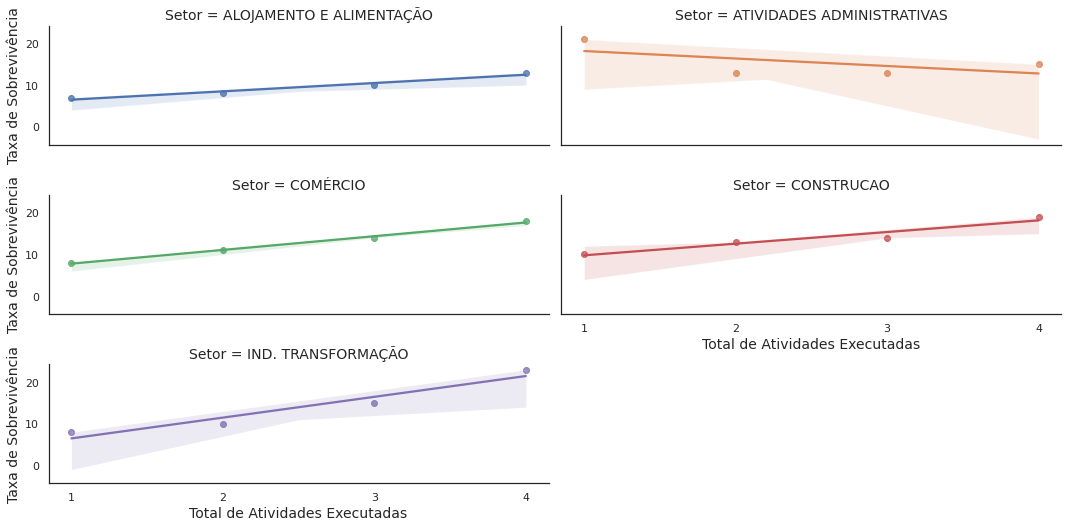

In [ ]:
#plt.figure(figsize=(14,6))

#fig  = px.bar(df_teste_1, x = "Total de atividades executadas", y= "Taxa de Sobrevivencia", text="Taxa de Sobrevivencia", color = "Setor", barmode='group')

#fig = px.line(df_teste_1.query("Setor == 'COMÉRCIO'"), x = "Total de atividades executadas", y= "Taxa de Sobrevivencia", color = "Setor",  text="Taxa de Sobrevivencia")

sns.set( rc = {'figure.figsize' : ( 30, 50 ),  
               'axes.labelsize' : 14 }) 

sns.set_style('white')

g = sns.lmplot(x= "Total de atividades executadas", y= "Taxa de Sobrevivencia", data= df_teste_1, hue= "Setor",  col= "Setor", col_wrap= 2, height=2.5, aspect= 3, legend= False, truncate=True )

#g.set_axis_labels( "Taxa de Sobrevivencia" , "Vida em anos" )

plt.xticks([1,2,3,4])

g.set_axis_labels( "Total de Atividades Executadas" , "Taxa de Sobrevivência")

#fig.show()

# 5 Setores - Vida Média das Empresas Ativas por UF

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["cd_situacao_cadastral"] =="ATIVA") ]

df_teste_1 = df_est_tratada_1.groupby(["Setor", "cd_situacao_cadastral", "uf"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_2 = pd.DataFrame(df_teste_1)

df_teste_2 = df_teste_2.loc[(df_teste_2["Setor"] == "COMÉRCIO") | (df_teste_2["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_teste_2["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_2["Setor"] == "CONSTRUCAO") | (df_teste_2["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

In [ ]:
fig  = px.bar(df_teste_2, y = "Anos_de_vida", x= "Setor", text="Anos_de_vida", color = "uf", color_continuous_scale= ['#99a6c2','#99a6c2','#99a6c2', '#414778'], barmode="group", title= "Vida média das Empresas Ativas no Sudeste por UF", color_discrete_map= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'} )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

plot(fig)


# 5 Setores - Vida Média das Empresas Inativas por UF

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["cd_situacao_cadastral"] =="INATIVA") ]

df_teste_1 = df_est_tratada_1.groupby(["Setor", "cd_situacao_cadastral", "uf"], as_index=False)["Anos_de_vida"].mean().reset_index().round(2)

df_teste_2 = pd.DataFrame(df_teste_1)

df_teste_2 = df_teste_2.loc[(df_teste_2["Setor"] == "COMÉRCIO") | (df_teste_2["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_teste_2["Setor"] == "IND. TRANSFORMAÇÃO") | (df_teste_2["Setor"] == "CONSTRUCAO") | (df_teste_2["Setor"] == "ATIVIDADES ADMINISTRATIVAS") ]

In [ ]:
fig  = px.bar(df_teste_2, y = "Anos_de_vida", x= "Setor", text="Anos_de_vida", color = "uf", barmode="group", title= "Vida média das Empresas Inativas no Sudeste por UF", color_discrete_map= {'ATIVA':'#414778', 'INATIVA': '#99a6c2'} )

fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

plot(fig)

# DAQUI PRA BAIXO NAO FIZ NADA

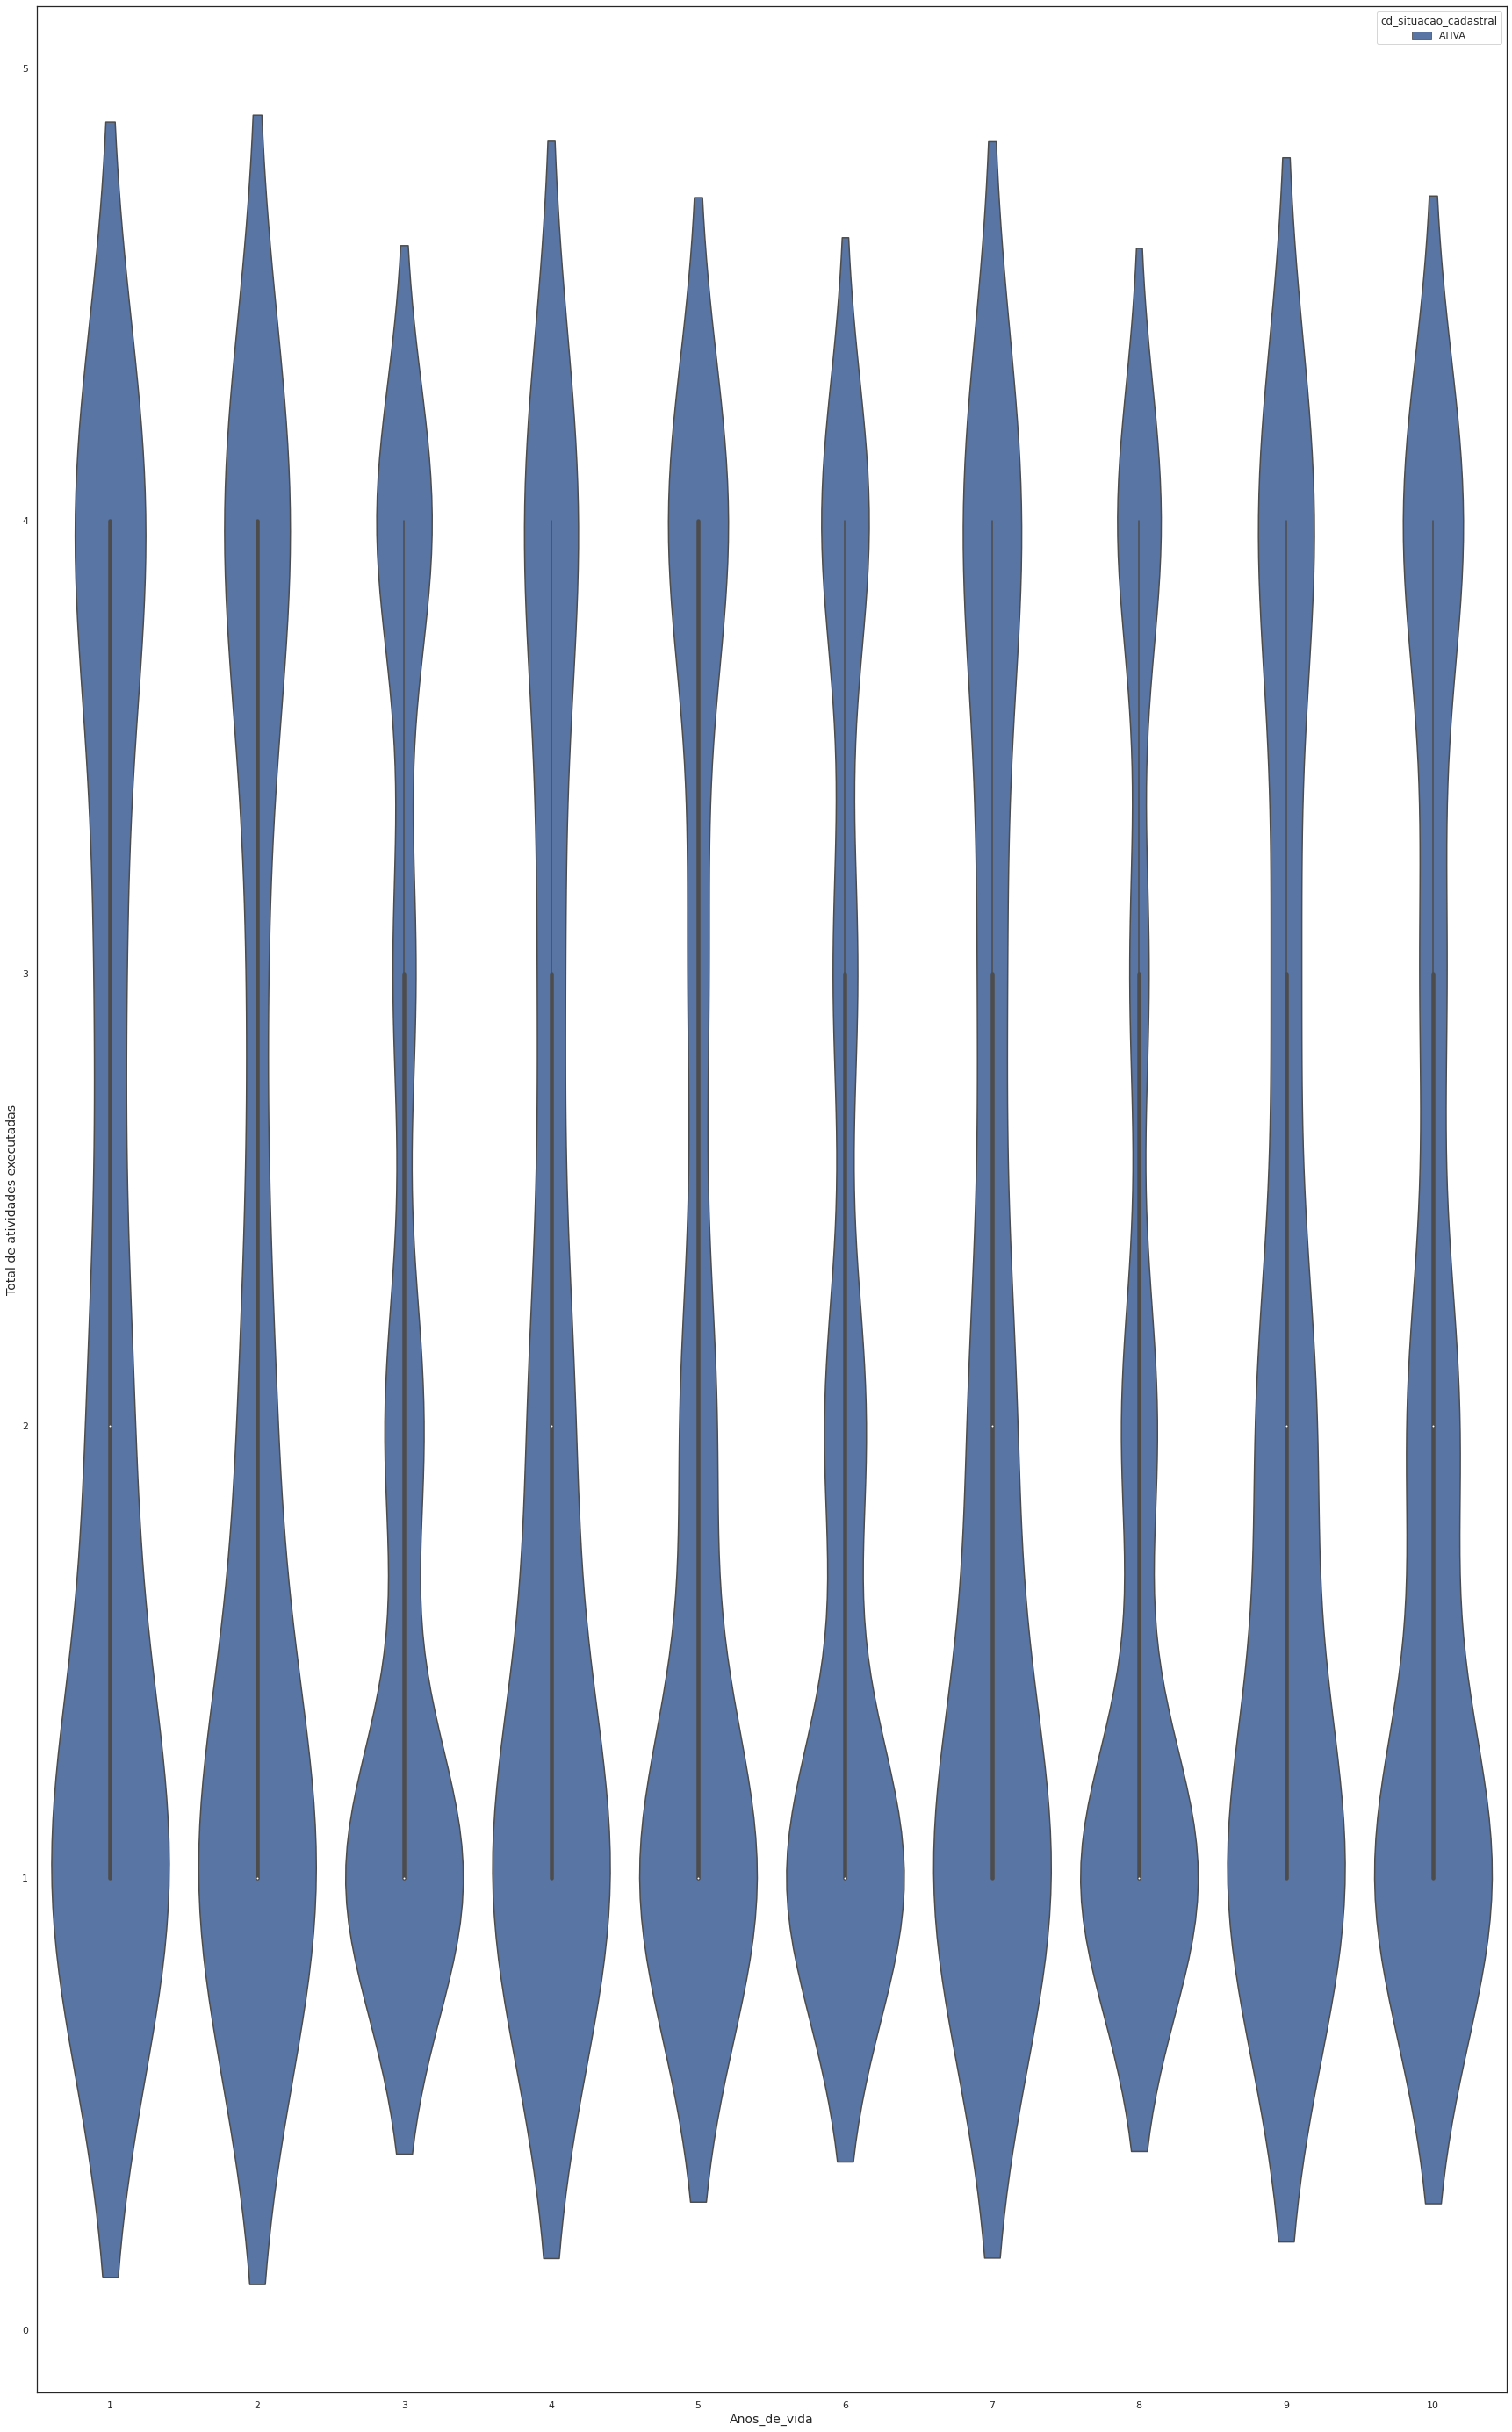

In [ ]:
df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)
& (df_est_tratada["cd_situacao_cadastral"]== 'ATIVA')]

ax = sns.violinplot(x = df_est_tratada_com_com["Anos_de_vida"], y = df_est_tratada_com_com["Total de atividades executadas"], hue = df_est_tratada_com_com["cd_situacao_cadastral"], style = 'event', data=df_est_tratada )

#ax = sns.countplot(x= df_est_tratada_com_com["Anos_de_vida"],hue= df_est_tratada_com_com["Total de atividades executadas"]
#)

#valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

#for container in ax.containers:
#    ax.bar_label(container)

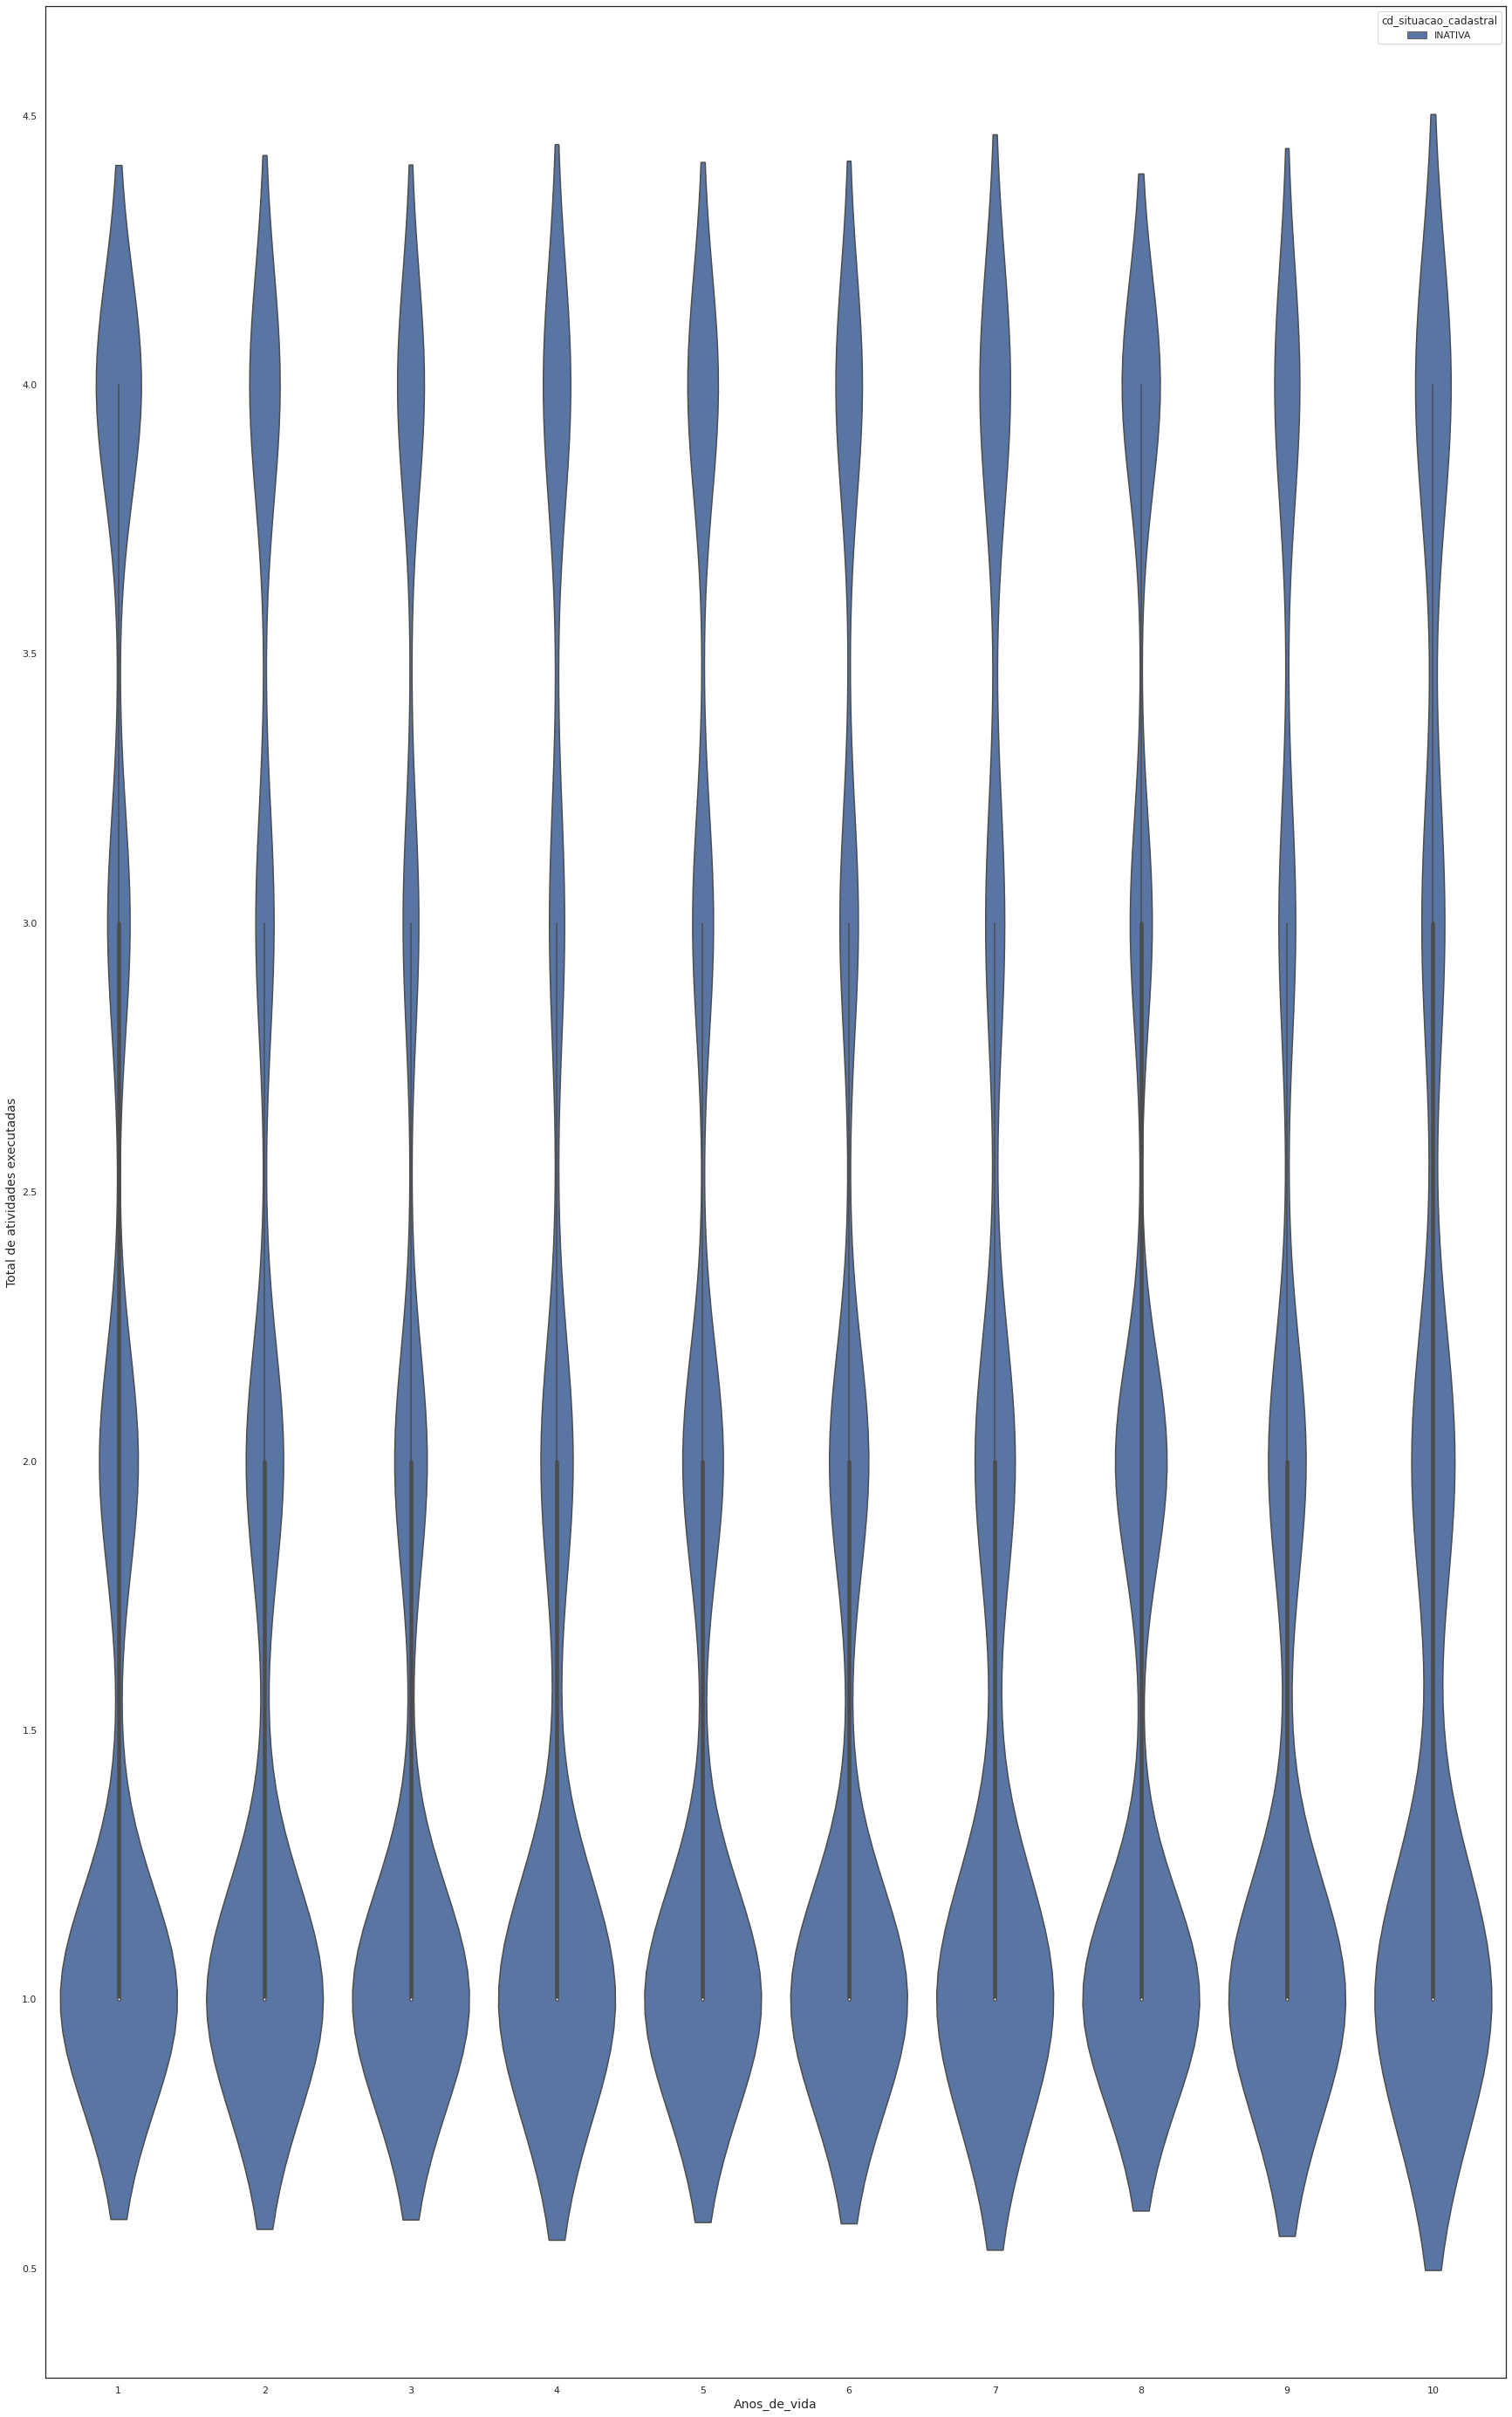

In [ ]:
df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)
& (df_est_tratada["cd_situacao_cadastral"]== 'INATIVA')]

ax = sns.violinplot(x = df_est_tratada_com_com["Anos_de_vida"], y = df_est_tratada_com_com["Total de atividades executadas"], hue = df_est_tratada_com_com["cd_situacao_cadastral"], style = 'event', data=df_est_tratada )

#ax = sns.countplot(x= df_est_tratada_com_com["Anos_de_vida"],hue= df_est_tratada_com_com["Total de atividades executadas"]
#)

#valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

#for container in ax.containers:
#    ax.bar_label(container)

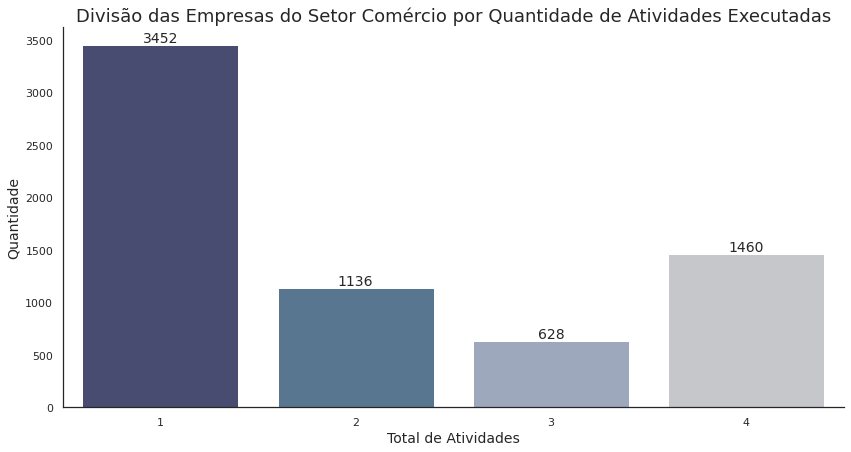

In [ ]:
df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["cd_situacao_cadastral"]== 'ATIVA')]

layout_grafico('Divisão das Empresas por Empresas por Quantidade de Atividades Executadas')

ax = sns.countplot(x= df_est_tratada_com_com["Total de atividades executadas"], palette= ['#414778','#507699','#99a6c2' , '#c4c6cc']
)
plt.ylabel('Quantidade', size= 14)
plt.xlabel('Total de Atividades', size= 14)
plt.title('Divisão das Empresas do Setor Comércio por Quantidade de Atividades Executadas', size= 18)
sns.set_style('white')

valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

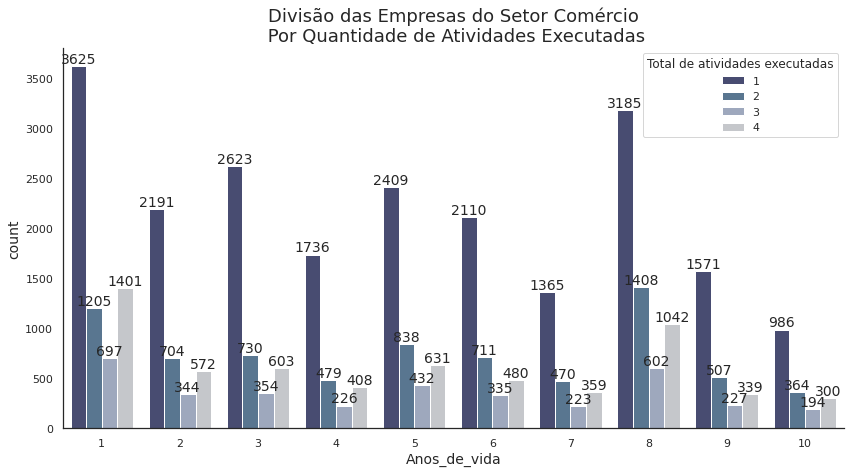

In [ ]:
df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)
& (df_est_tratada["cd_situacao_cadastral"]== 'INATIVA')]

layout_grafico('Divisão das Empresas do Setor Comércio\n Por Quantidade de Atividades Executadas - ATIVAS')

ax= sns.countplot(x= "Anos_de_vida",hue= "Total de atividades executadas", data=df_est_tratada_com_com, palette= palete
)
plt.title('Divisão das Empresas do Setor Comércio\n Por Quantidade de Atividades Executadas', size = 18)
valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

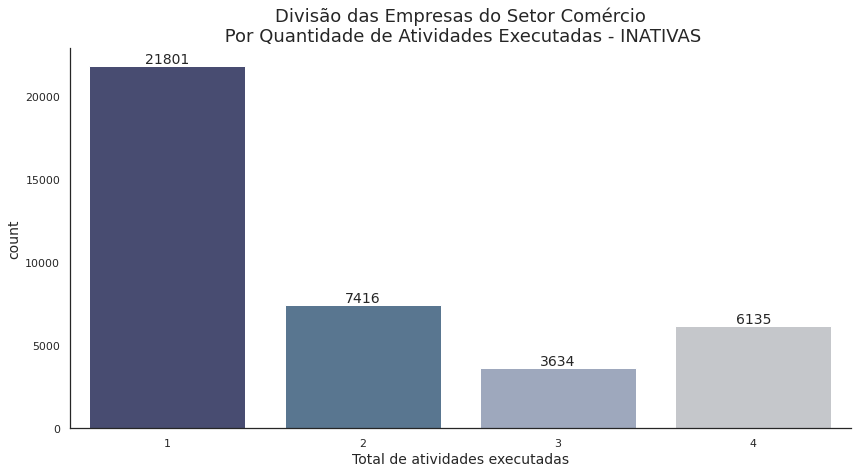

In [ ]:
df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)
& (df_est_tratada["cd_situacao_cadastral"]== 'INATIVA')]

layout_grafico('Divisão das Empresas do Setor Comércio\n Por Quantidade de Atividades Executadas - INATIVAS')

ax = sns.countplot(x= df_est_tratada_com_com["Total de atividades executadas"], palette= palete
)
plt.title("Divisão das Empresas do Setor Comércio\n Por Quantidade de Atividades Executadas - INATIVAS",size= 18)
valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

<Figure size 1008x432 with 0 Axes>

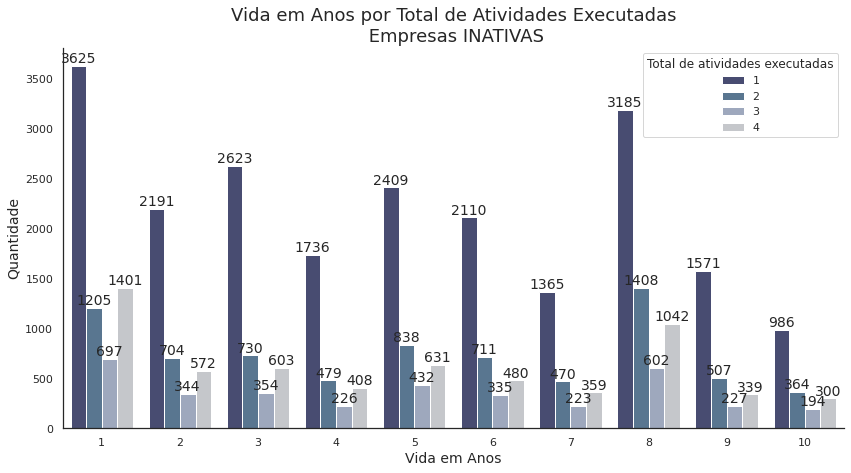

In [ ]:
plt.figure(figsize=(14,6))

df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)
& (df_est_tratada["cd_situacao_cadastral"]== 'INATIVA')]

layout_grafico('')

ax = sns.countplot(x= df_est_tratada_com_com["Anos_de_vida"],hue= df_est_tratada_com_com["Total de atividades executadas"],
palette= palete)
plt.ylabel("Quantidade", size= 14)
plt.xlabel('Vida em Anos', size= 14)
plt.title('Vida em Anos por Total de Atividades Executadas\n Empresas INATIVAS', size= 18)

valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
def conf_eixos(titulo):
    plt.ylabel("Quantidade", size= 14)
    plt.xlabel('Vida em Anos', size= 14)
    plt.title(titulo, size= 18)

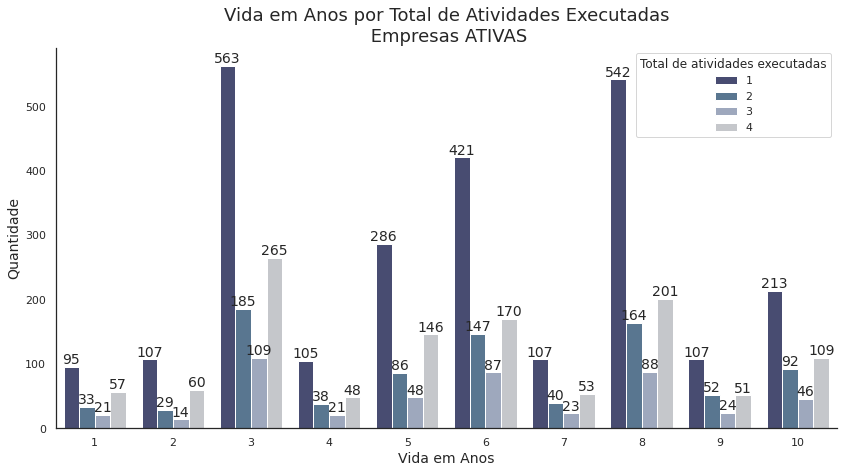

In [ ]:
df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)
& (df_est_tratada["cd_situacao_cadastral"]== 'ATIVA')]

layout_grafico('')

ax = sns.countplot(x= df_est_tratada_com_com["Anos_de_vida"],hue= df_est_tratada_com_com["Total de atividades executadas"],
palette= palete)
conf_eixos('Vida em Anos por Total de Atividades Executadas\n Empresas ATIVAS')
valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)

for container in ax.containers:
    ax.bar_label(container)

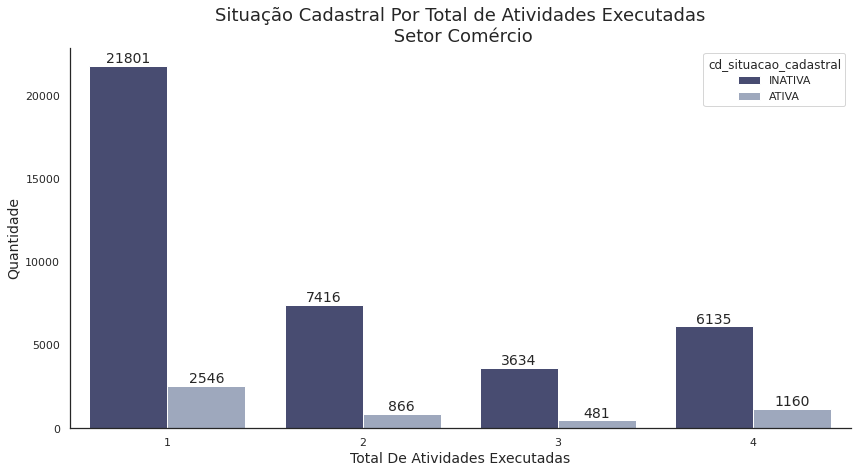

In [ ]:
layout_grafico('')

df_est_tratada_com_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") & (df_est_tratada["Anos_de_vida"] >0) & (df_est_tratada["Anos_de_vida"] <=10)]


ax = sns.countplot(x= df_est_tratada_com_com["Total de atividades executadas"],
hue= df_est_tratada_com_com["cd_situacao_cadastral"], palette= ['#414778','#99a6c2']
)
conf_eixos('Situação Cadastral Por Total de Atividades Executadas\n Setor Comércio')
valor = df_est_tratada_com_com["cd_situacao_cadastral"].value_counts(ascending = False)
plt.xlabel('Total De Atividades Executadas')

for container in ax.containers:
    ax.bar_label(container)

In [ ]:
palette3= ['#414778','#99a6c2']

In [ ]:
teste

,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
1,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,8513900,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
10,4637104,4637101,4637102,4637103,4637107,4637199,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177631,8230001,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
177633,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
177634,8219901,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
177635,7739099,4729699,4772500,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_est_tratada['Situação Cadastral'] = df_est_tratada['cd_situacao_cadastral']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



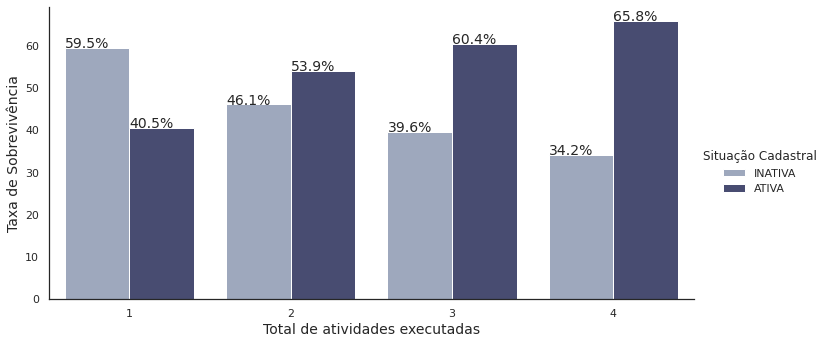

In [ ]:
df_est_tratada_com = df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") | (df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_est_tratada["Setor"] == "IND. TRANSFORMAÇÃO") | (df_est_tratada["Setor"] == "CONSTRUCAO") | (df_est_tratada["Setor"] == "ATIVIDADES ADMINISTRATIVAS")]

teste = df_est_tratada_com.groupby("Total de atividades executadas")["Situação Cadastral"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Total de atividades executadas", y='Percentual', hue="Situação Cadastral",
kind='bar', data=teste, height= 5, aspect= 2, palette= ['#99a6c2', '#414778'] )


plt.ylabel("Taxa de Sobrevivência", size= 14)
plt.xlabel('Total de atividades executadas', size= 14)


for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


In [ ]:
palette2= ['#99a6c2', '#414778']

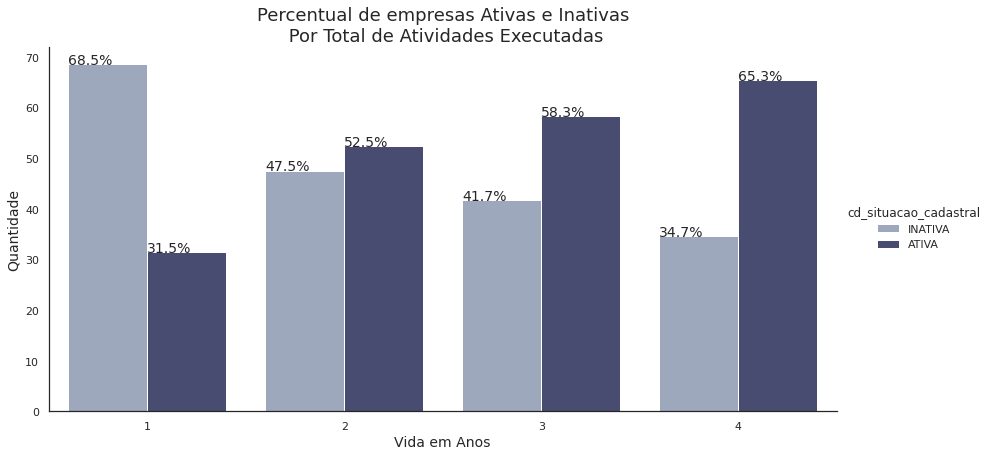

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO")]

teste = df_est_tratada_1.groupby("Total de atividades executadas")["cd_situacao_cadastral"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Total de atividades executadas", y='Percentual', hue="cd_situacao_cadastral", kind='bar', data=teste, height= 6, aspect=2, palette= palette2 )

conf_eixos('Percentual de empresas Ativas e Inativas\n Por Total de Atividades Executadas')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


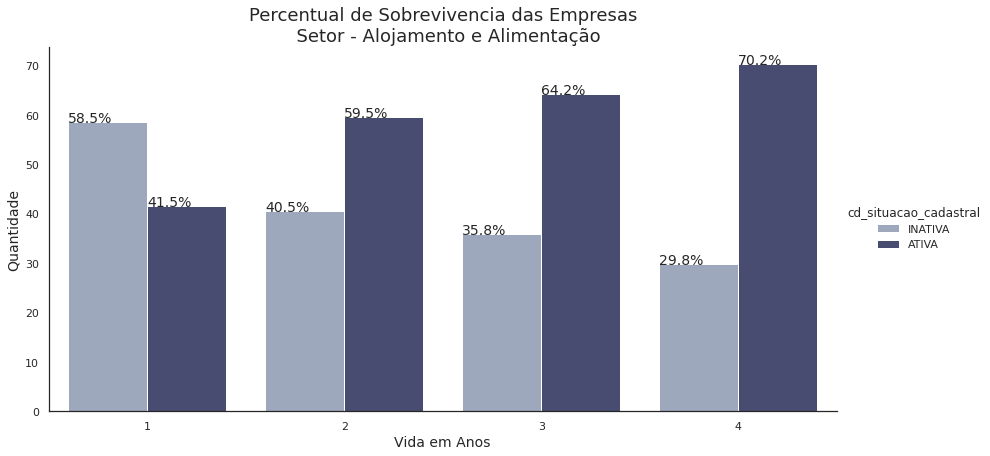

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")]

teste = df_est_tratada_1.groupby("Total de atividades executadas")["cd_situacao_cadastral"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Total de atividades executadas",
                y='Percentual',
                hue="cd_situacao_cadastral",
                kind='bar',
                data=teste,
                height= 6,
                aspect= 2,
                palette= palette2)

conf_eixos('Percentual de Sobrevivencia das Empresas\n  Setor - Alojamento e Alimentação')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


In [ ]:
df_est_tratada_1= df_est_tratada[df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO"]

teste = df_est_tratada_1.groupby(["Setor"])["cd_situacao_cadastral"].value_counts(normalize = True)

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") | (df_est_tratada["Setor"] == "ALOJAMENTO E ALIMENTAÇÃO")
                                        | (df_est_tratada["Setor"] == "IND. TRANSFORMAÇÃO")]

df_est_tratada_1 = df_est_tratada_1.loc[(df_est_tratada_1["Anos_de_vida"] > 0)]

df_teste = df_est_tratada_1.groupby(["Total de atividades executadas", "Setor"])["cd_situacao_cadastral"].value_counts(normalize = True)

df_teste

Total de atividades executadas  Setor                     cd_situacao_cadastral
1                               ALOJAMENTO E ALIMENTAÇÃO  INATIVA                  0.931019
                                                          ATIVA                    0.068981
                                COMÉRCIO                  INATIVA                  0.921881
                                                          ATIVA                    0.078119
                                IND. TRANSFORMAÇÃO        INATIVA                  0.922646
                                                          ATIVA                    0.077354
2                               ALOJAMENTO E ALIMENTAÇÃO  INATIVA                  0.938531
                                                          ATIVA                    0.061469
                                COMÉRCIO                  INATIVA                  0.896840
                                                          ATIVA                    0.103160


In [ ]:
df_total = round(df_teste, 2)*100


In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Anos_de_vida"] >0)]

df_teste_1 = df_est_tratada_1.groupby(["Setor", "cd_situacao_cadastral"], as_index = False)["Anos_de_vida"].mean()

df_teste_1


,Setor,cd_situacao_cadastral,Anos_de_vida
0,ADM. PUBLICA,ATIVA,13.761194
1,ADM. PUBLICA,INATIVA,16.430556
2,AGRICULTURA,ATIVA,8.435897
3,AGRICULTURA,INATIVA,6.161183
4,AGUA E ESGOTO,ATIVA,7.235294
5,AGUA E ESGOTO,INATIVA,7.020270
6,ALOJAMENTO E ALIMENTAÇÃO,ATIVA,7.186383
7,ALOJAMENTO E ALIMENTAÇÃO,INATIVA,8.058116
8,ARTES E CULTURA,ATIVA,9.478927
9,ARTES E CULTURA,INATIVA,9.148258


In [ ]:
df_teste_1= df_teste_1.sort_values(by= 'Anos_de_vida', ascending= False)

In [ ]:
df_teste_1 = pd.DataFrame(df_teste_1).reset_index()

In [ ]:
plt.rcParams.update({'font.size':14})
fig2_v2 = px.bar(df_teste_1.sort_values(by='Anos_de_vida', ascending=True), y='Setor', x='Anos_de_vida', color= 'cd_situacao_cadastral', barmode= 'group',
color_discrete_sequence= px.colors.qualitative.T10, template='simple_white', height= 800, opacity= 0.8)
fig2_v2.update_layout(
    title='Anos de vida por setor',
    yaxis_title='Anos_de_vida',
    xaxis_title='Setor'
)
fig2_v2.update_traces(
    texttemplate='%{x:.2f}',
    textposition='outside'
)

fig2_v2.show()

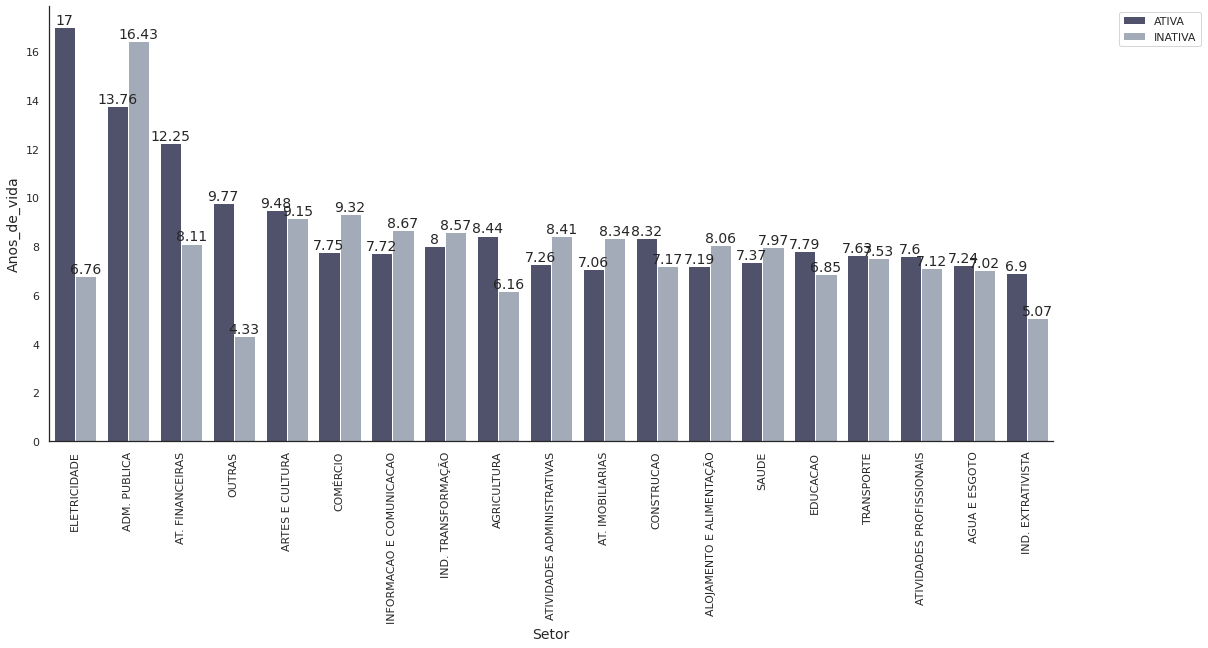

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.rcParams.update({'font.size':14})
plt.xticks(rotation=90)

g = sns.barplot(x='Setor', y=round(df_teste_1['Anos_de_vida'],2), 
                data= df_teste_1, hue= 'cd_situacao_cadastral', 
                palette= palette3,
                saturation= 0.5)
plt.legend(bbox_to_anchor=(1.06, 1), loc=2)

sns.despine(right=True)
for container in g.containers:
    g.bar_label(container)

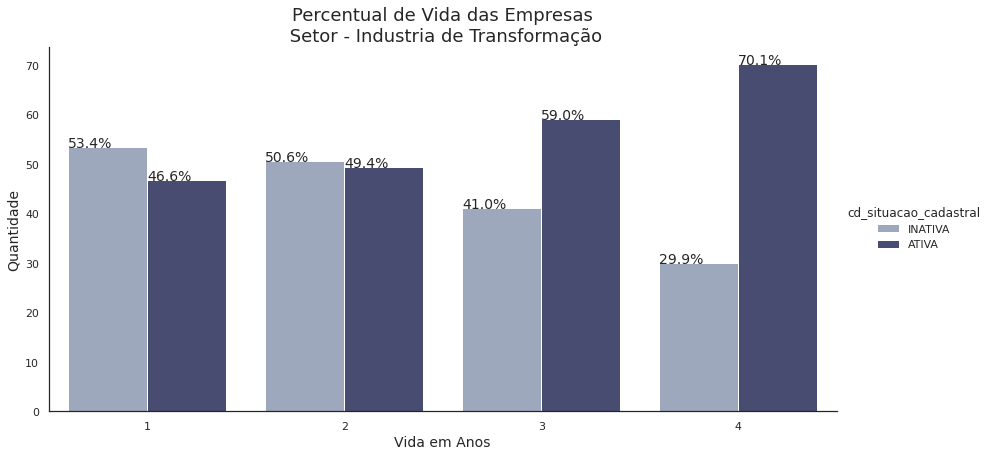

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "IND. TRANSFORMAÇÃO")]

teste = df_est_tratada_1.groupby("Total de atividades executadas")["cd_situacao_cadastral"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Total de atividades executadas",
                y='Percentual',
                hue="cd_situacao_cadastral", 
                kind='bar', 
                data=teste,
                palette= palette2,
                height= 6,
                aspect= 2)

conf_eixos('Percentual de Vida das Empresas\n Setor - Industria de Transformação')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)




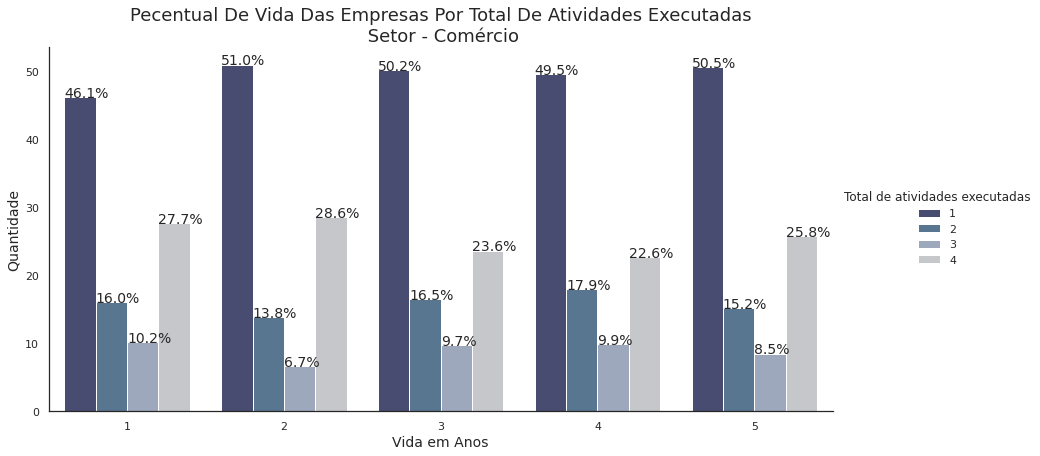

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>0) & (df_est_tratada["Anos_de_vida"]<=5 )
                                    & (df_est_tratada["cd_situacao_cadastral"] == "ATIVA")]

teste = df_est_tratada_1.groupby("Anos_de_vida")["Total de atividades executadas"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", 
                y='Percentual', 
                hue= "Total de atividades executadas", 
                kind='bar', 
                data=teste,
                palette= palete,
                height= 6,
                aspect= 2)

conf_eixos('Pecentual De Vida Das Empresas Por Total De Atividades Executadas\n Setor - Comércio')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

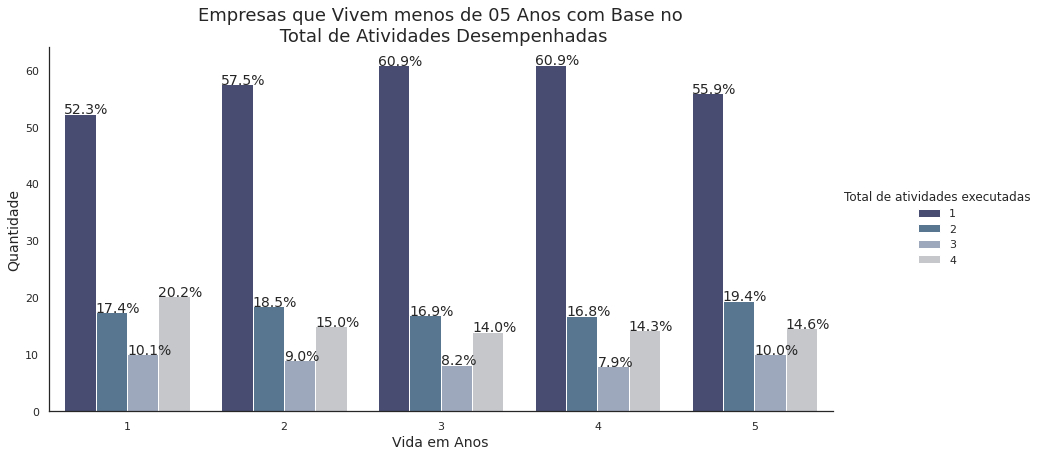

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>0) & (df_est_tratada["Anos_de_vida"]<=5 )
                                    & (df_est_tratada["cd_situacao_cadastral"] == "INATIVA")]

teste = df_est_tratada_1.groupby("Anos_de_vida")["Total de atividades executadas"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", 
                y='Percentual', 
                hue= "Total de atividades executadas", 
                kind='bar', 
                data=teste,
                palette= palete,
                height= 6,
                aspect= 2)

conf_eixos('Empresas que Vivem menos de 05 Anos com Base no\n Total de Atividades Desempenhadas')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

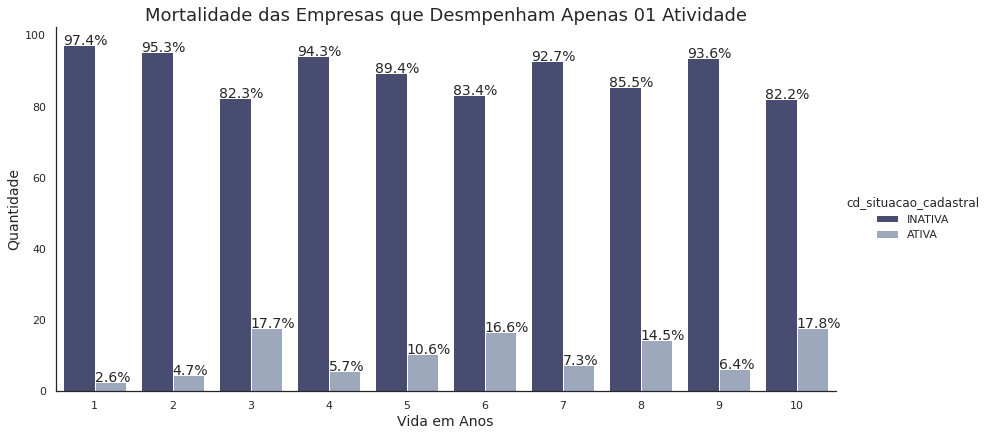

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>0) & (df_est_tratada["Anos_de_vida"]<=10 )
                                    & (df_est_tratada["Total de atividades executadas"] == 1)]

teste = df_est_tratada_1.groupby("Anos_de_vida")["cd_situacao_cadastral"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", 
                y='Percentual', 
                hue= "cd_situacao_cadastral", 
                kind='bar', 
                data=teste,
                height= 6,
                aspect= 2,
                palette= palette3)

conf_eixos('Mortalidade das Empresas que Desmpenham Apenas 01 Atividade')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



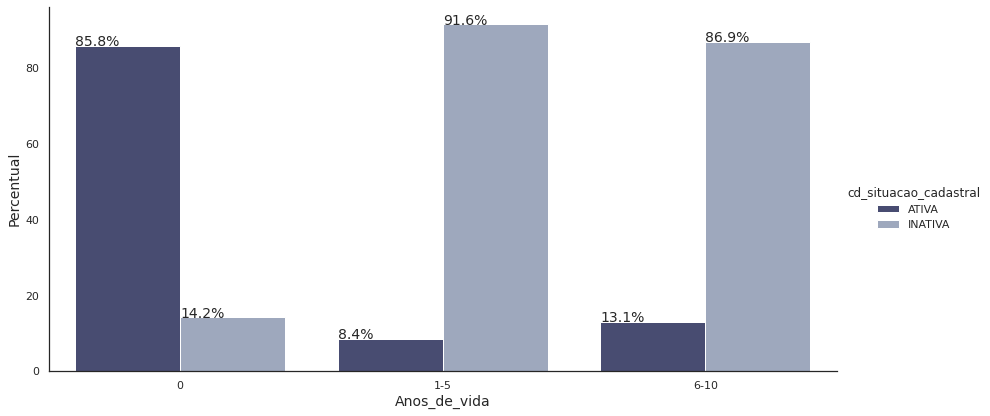

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>=0) & (df_est_tratada["Anos_de_vida"]<=10 )
                                    & (df_est_tratada["Total de atividades executadas"] == 1)]

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1.loc[:,"Anos_de_vida"].replace([1, 2, 3, 4, 5], "1-5")

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1.loc[:,"Anos_de_vida"].replace([6, 7, 8, 9, 10], "6-10")

teste = df_est_tratada_1.groupby("Anos_de_vida")["cd_situacao_cadastral"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", 
                y='Percentual', 
                hue= "cd_situacao_cadastral", 
                kind='bar', 
                data=teste,
                palette= palette3,
                height= 6,
                aspect= 2)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



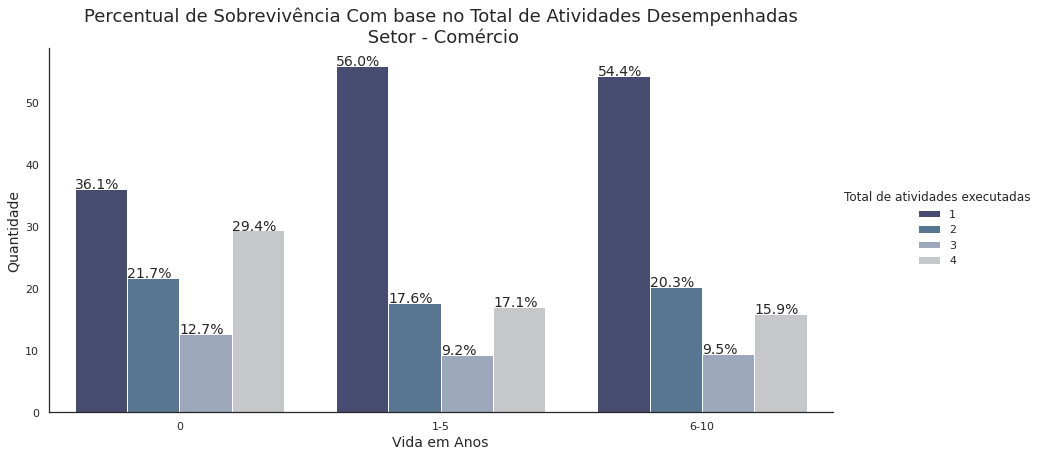

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>=0) & (df_est_tratada["Anos_de_vida"]<=10 )
                                    ]

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([1, 2, 3, 4, 5], "1-5")

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([6, 7, 8, 9, 10], "6-10")

teste = df_est_tratada_1.groupby("Anos_de_vida")["Total de atividades executadas"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", 
                y='Percentual', 
                hue= "Total de atividades executadas", 
                kind='bar', 
                data=teste,
                height= 6,
                aspect=2,
                palette= palete)

conf_eixos('Percentual de Sobrevivência Com base no Total de Atividades Desempenhadas\n Setor - Comércio')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



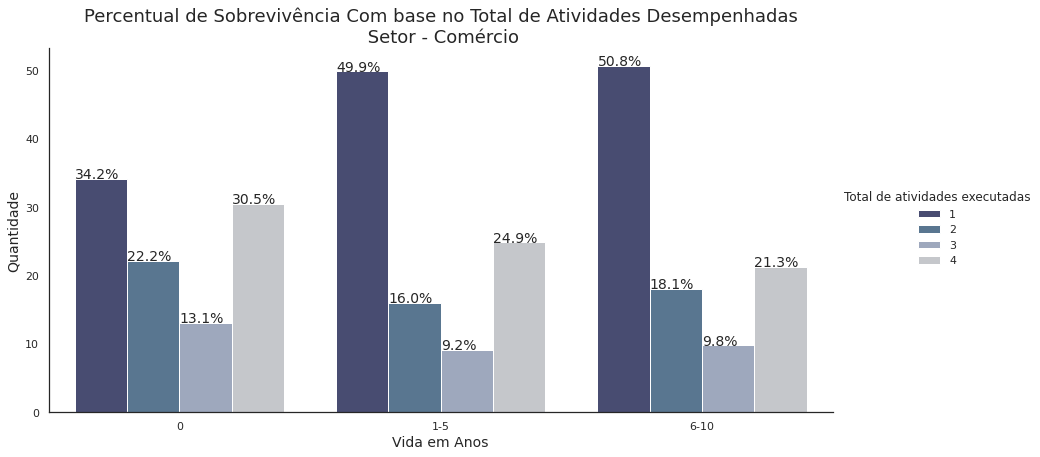

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>=0) & (df_est_tratada["Anos_de_vida"]<=10) &
                                    (df_est_tratada["cd_situacao_cadastral"] == "ATIVA")]

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([1, 2, 3, 4, 5], "1-5")

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([6, 7, 8, 9, 10], "6-10")

teste = df_est_tratada_1.groupby("Anos_de_vida")["Total de atividades executadas"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", 
                y='Percentual', 
                hue= "Total de atividades executadas", 
                kind='bar', 
                data=teste,
                height= 6,
                aspect=2,
                palette= palete)

conf_eixos('Percentual de Sobrevivência Com base no Total de Atividades Desempenhadas\n Setor - Comércio')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [ ]:
df_est_tratada_1.head()

,cnpj_base,cd_situacao_cadastral,dt_situacao_cadastral,dt_inicio_atividade,cd_cnae_principal,cd_cnae_secundario,uf,cnpj_base_2,Data_Situação_Cadastral,Data_Início_Atividade,Anos_de_vida,Mes_de_vida,Setor,Empresa executa 2 atividades,Empresa executa até 3 atividades,Empresa executa mais de 4 atividades,Total de atividades executadas,Situação Cadastral
34,11124623,ATIVA,20090827,20090827,4754701,"4785799,9529105",SP,11124623,2009,2009,0,0,COMÉRCIO,1,1,0,3,ATIVA
63,11124994,ATIVA,20090910,20090910,4742300,"4752100,4751201,4759899,4321500,7319002",MG,11124994,2009,2009,0,0,COMÉRCIO,1,1,1,4,ATIVA
69,11125067,ATIVA,20090909,20090909,4789004,4789002,MG,11125067,2009,2009,0,0,COMÉRCIO,1,0,0,2,ATIVA
80,11125206,ATIVA,20090910,20090910,4781400,,SP,11125206,2009,2009,0,0,COMÉRCIO,0,0,0,1,ATIVA
109,11125590,ATIVA,20090910,20090910,4641902,,MG,11125590,2009,2009,0,0,COMÉRCIO,0,0,0,1,ATIVA


In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Anos_de_vida"]>0) & (df_est_tratada["cd_situacao_cadastral"] =='ATIVA')]

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([0,1, 2, 3, 4, 5], "0-5")

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([6, 7, 8, 9, 10, 11], "6-11")

teste = df_est_tratada_1.groupby("uf")["Anos_de_vida"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="uf", y='Percentual', hue= "Anos_de_vida", kind='bar', data=teste, height= 8, aspect= 1.5, palette= palette3

conf_eixos('Taxa de Sobrevivência Por Estado')

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

SyntaxError: invalid syntax (<ipython-input-81-29094a3d8c98>, line 13)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



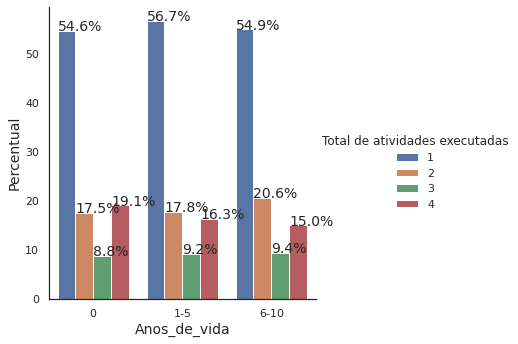

In [ ]:
df_est_tratada_1= df_est_tratada.loc[(df_est_tratada["Setor"] == "COMÉRCIO") &(df_est_tratada["Anos_de_vida"]>=0) & (df_est_tratada["Anos_de_vida"]<=10) &
                                    (df_est_tratada["cd_situacao_cadastral"] == "INATIVA")]

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([1, 2, 3, 4, 5], "1-5")

df_est_tratada_1["Anos_de_vida"] = df_est_tratada_1["Anos_de_vida"].replace([6, 7, 8, 9, 10], "6-10")

teste = df_est_tratada_1.groupby("Anos_de_vida")["Total de atividades executadas"].value_counts(normalize = True)

teste = teste.mul(100).rename('Percentual').reset_index()

g = sns.catplot(x="Anos_de_vida", y='Percentual', hue= "Total de atividades executadas", kind='bar', data=teste)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f987927e-68d4-4aee-bd26-129b04c252b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>